In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore') 

<div style="background-color: purple; color: white; border-left: 6px solid #b3d4fc; padding: 10px;">
    <h1>Content</h1>
</div>
<div style="background-color: purple; color: white; border-left: 6px solid #b3d4fc; padding: 10px; font-size:20px;
           font-family:Verdana;">
    <ul>
        <li>Data Exploration</li>
    <li>Visualization
        <ul>
            <li>KDE Plot</li>
            <li>Histogram Plot</li>
            <li>Heatmap</li>
        </ul>
    </li>
    <li>Prediction</li>
</ul>
</div>

In [101]:
df = pd.read_csv("Travel.csv")

<a id = "1"></a><br>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#e8d0f5;
           width: %20;
           height: %50;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
              color:white;">
    Data Exploration</h2>
</div>

In [102]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [103]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [105]:
for i in df.columns:
    print(df[i].value_counts())
    print("---------------")

CustomerID
200000    1
203256    1
203263    1
203262    1
203261    1
         ..
201628    1
201627    1
201626    1
201625    1
204887    1
Name: count, Length: 4888, dtype: int64
---------------
ProdTaken
0    3968
1     920
Name: count, dtype: int64
---------------
Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: count, dtype: int64
---------------
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
---------------
CityTier
1    3190
3    1500
2     198
Name: count,

#### ProdTaken, Passport and OwnCar can be used for binary classification
#### CityTier, PreferredPropertyStar can be used for multi-class classification

In [106]:
continuous_columns = [col for col in df.select_dtypes(include='number').columns if df[col].nunique() > 10]
print("Continuous Features:", continuous_columns)

Continuous Features: ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']


In [107]:
# check nan values ratios
def check_nan_value_ratio(df):
    nan_ratios = df.isna().sum() / len(df)
    for i, ind in enumerate(nan_ratios):
        percentage = ind * 100
        formatted_percentage = f"%{percentage:.5f}"
        print(f"{nan_ratios.index[i]} : {formatted_percentage}")

In [108]:
check_nan_value_ratio(df)

CustomerID : %0.00000
ProdTaken : %0.00000
Age : %4.62357
TypeofContact : %0.51146
CityTier : %0.00000
DurationOfPitch : %5.13502
Occupation : %0.00000
Gender : %0.00000
NumberOfPersonVisiting : %0.00000
NumberOfFollowups : %0.92062
ProductPitched : %0.00000
PreferredPropertyStar : %0.53191
MaritalStatus : %0.00000
NumberOfTrips : %2.86416
Passport : %0.00000
PitchSatisfactionScore : %0.00000
OwnCar : %0.00000
NumberOfChildrenVisiting : %1.35025
Designation : %0.00000
MonthlyIncome : %4.76678


In [109]:
null_columns = df.columns[df.isnull().any()].tolist()

In [110]:
null_columns

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [111]:
continuous_null_columns = list(set(null_columns) & set(continuous_columns))
continuous_null_columns

['Age', 'MonthlyIncome', 'NumberOfTrips', 'DurationOfPitch']

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#e8d0f5;
           width: %20;
           height: %50;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
              color:white;">
    Visualization</h2>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#e8d0f5;
           width: %20;
           height: %50;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h3 style="padding: 10px;
              color:white;">
    KDE Plot</h3>
</div>

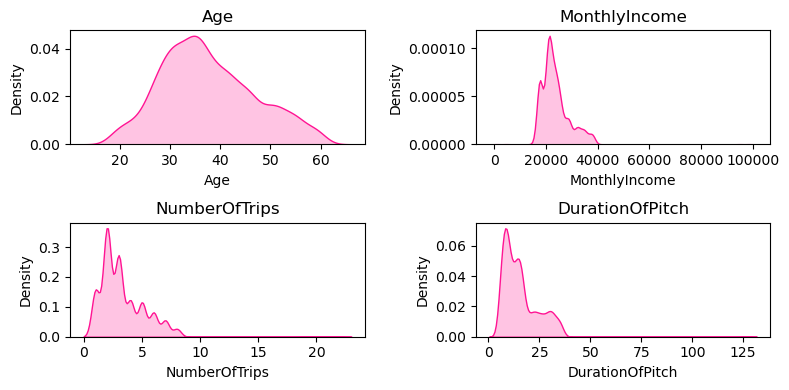

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4))

for i, feature in enumerate(continuous_null_columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(df[feature], ax=ax, color='deeppink', fill=True)
    ax.set_title(feature)

plt.tight_layout()
plt.show()

<div style="background-color: #e7f3fe; color: #31708f; border-left: 6px solid #b3d4fc; padding: 10px;">
    <strong>Interpration of kde plot:</strong> there is no skewness
</div>

In [113]:
# fill nan values
for i in continuous_null_columns:
    df[i].fillna(df[i].mean())

In [114]:
nan_continuous_null_columns = set(null_columns)-set(continuous_null_columns)
print(nan_continuous_null_columns)

{'PreferredPropertyStar', 'NumberOfFollowups', 'NumberOfChildrenVisiting', 'TypeofContact'}


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#e8d0f5;
           width: %20;
           height: %50;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h3 style="padding: 10px;
              color:white;">
    Histogram Plot</h3>
</div>

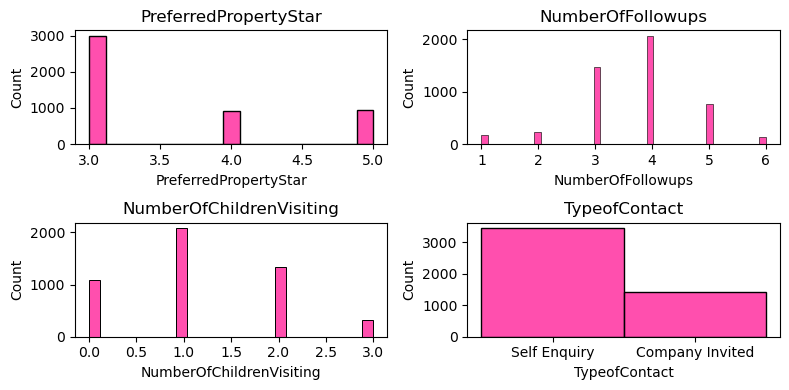

In [115]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4))

# For döngüsü ile her özelliği çizme
for i, feature in enumerate(nan_continuous_null_columns):
    ax = axes[i // 2, i % 2]  # 2x2 düzenine göre eksen seçimi
    sns.histplot(data=df[feature], ax=ax, color='deeppink')
    ax.set_title(feature)
plt.tight_layout()
plt.show()

In [116]:
# convert datatypes
for i in df.columns:
    mode_value = df[i].mode()[0]  # En sık tekrarlanan değeri al
    df[i].fillna(mode_value, inplace=True)  # NaN değerleri doldur

In [117]:
# check is there any nan value
df.isnull().sum().sum()

0

In [118]:
# categorical to numeric feature convertion
categorical_features = df.drop(columns=['Passport']).select_dtypes(include="object").columns
categorical_features = categorical_features.to_list()
print(categorical_features)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [119]:
# delete corrupted datas
df = df[df['Gender'] != 'Fe Male']
df.reset_index(drop=True, inplace=True)

In [120]:
df['TypeofContact'] = [1 if i == 'Self Enquiry' else 0 for i in df['TypeofContact']]

In [121]:
['CustomerID']+categorical_features

['CustomerID',
 'TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#e8d0f5;
           width: %20;
           height: %50;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h3 style="padding: 10px;
              color:white;">
    Heatmap</h3>
</div>

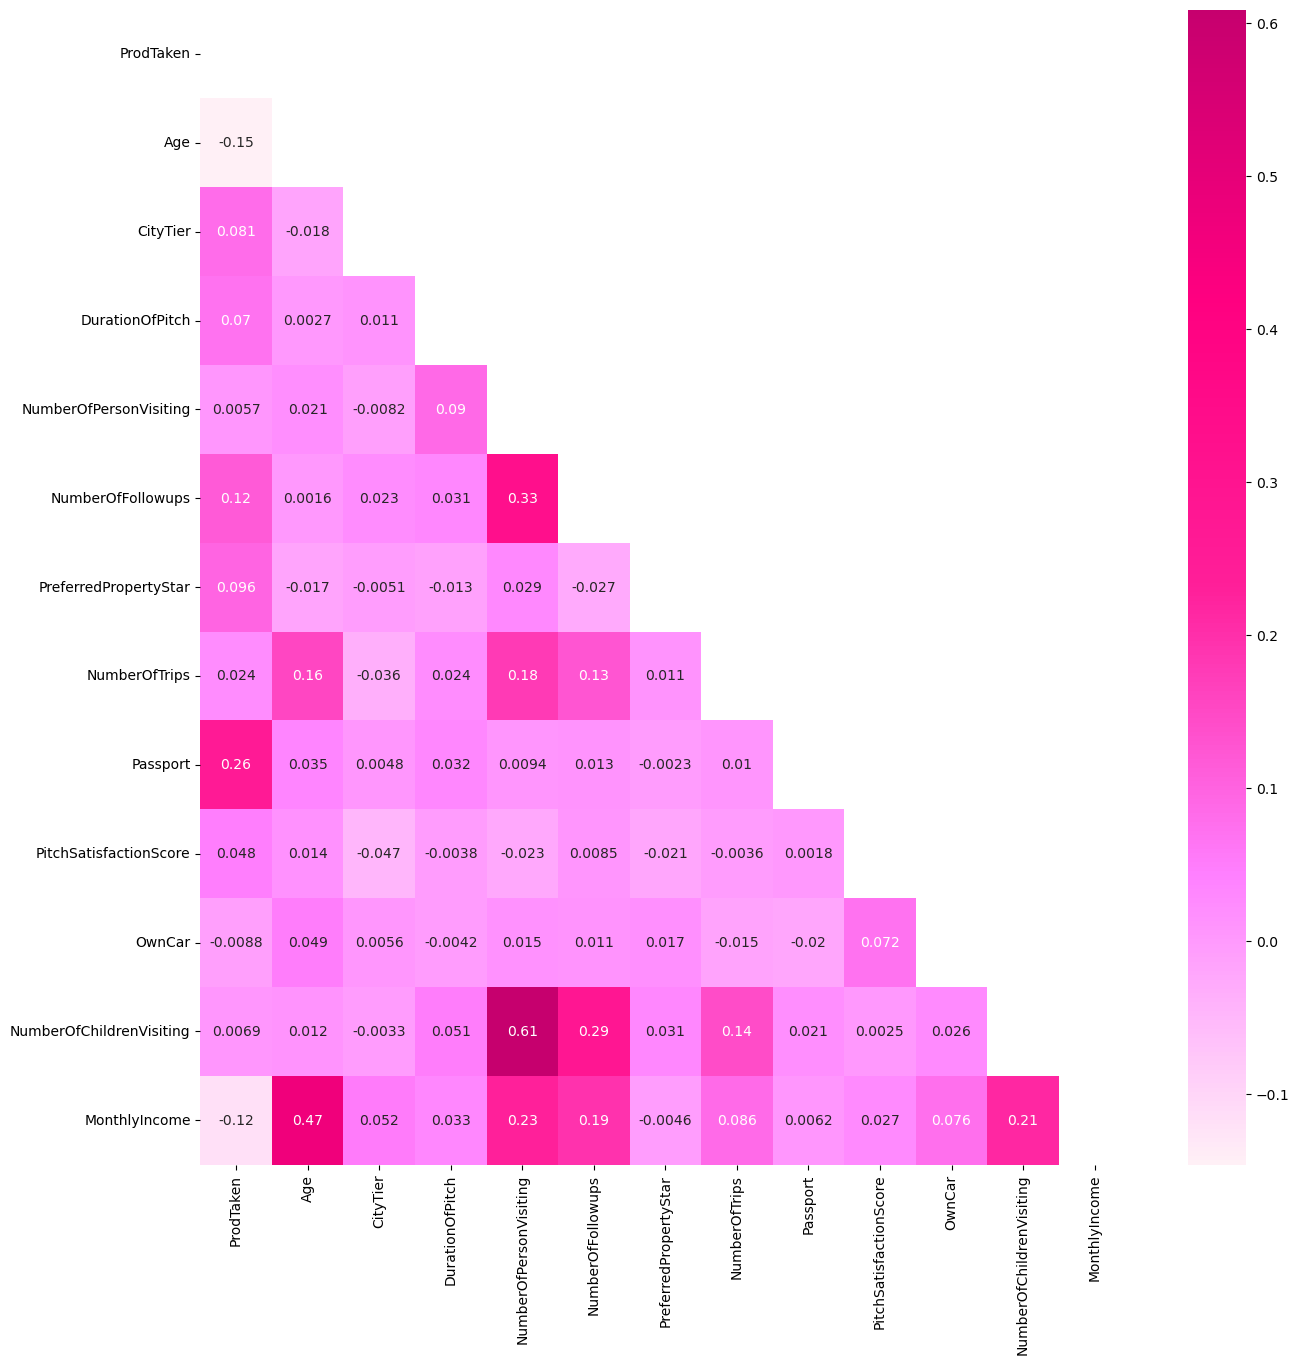

In [122]:
from matplotlib.colors import LinearSegmentedColormap
data = df.drop(columns=['CustomerID']+categorical_features)
mask = np.triu(np.ones_like(data.corr()))
plt.figure(figsize=(15,15))  
# plotting a triangle correlation heatmap 
colors = ["#fff0f6", "#ff80ff", "#ff1f99", "#ff0080", "#c6006e"]
pink_cmap = LinearSegmentedColormap.from_list("custom_pink", colors, N=256)

dataplot = sns.heatmap(data.corr(), cmap=pink_cmap, annot=True, mask=mask) 

# displaying heatmap 
plt.show() 

In [123]:
df.drop(columns=['CustomerID'], inplace=True)

In [124]:
categorical_features

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#e8d0f5;
           width: %20;
           height: %50;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h3 style="padding: 10px;
              color:white;">
    Outlier Detection</h3>
</div>

In [125]:
numerical_features = set(df.columns) - set(categorical_features)
numerical_features.remove('Passport')
numerical_features = list(numerical_features)
print(numerical_features)

['Age', 'MonthlyIncome', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'CityTier', 'DurationOfPitch', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'PreferredPropertyStar', 'ProdTaken', 'OwnCar', 'PitchSatisfactionScore']


In [126]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [127]:
df.loc[detect_outliers(df, numerical_features)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2340,1,45.0,1,3,19.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,7.0,1,3,1,0.0,AVP,33824.0
3111,1,53.0,1,3,9.0,Small Business,Female,3,6.0,King,3.0,Divorced,3.0,0,3,1,1.0,VP,38523.0
3269,1,46.0,1,3,9.0,Small Business,Female,4,6.0,King,4.0,Single,2.0,1,5,0,3.0,VP,37502.0
4516,1,53.0,1,3,9.0,Small Business,Female,3,6.0,King,3.0,Married,3.0,0,3,1,2.0,VP,38523.0
4678,1,52.0,0,1,35.0,Salaried,Male,4,5.0,Deluxe,3.0,Single,5.0,0,3,0,1.0,Manager,38525.0
4714,1,56.0,1,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,2.0,0,1,1,2.0,Executive,37865.0
3110,1,27.0,0,3,36.0,Small Business,Male,4,6.0,Deluxe,5.0,Unmarried,2.0,0,3,0,1.0,Manager,23647.0
3509,1,36.0,1,3,22.0,Small Business,Male,3,6.0,Deluxe,3.0,Married,8.0,1,1,1,2.0,Manager,24118.0
3579,1,33.0,1,3,7.0,Salaried,Male,3,6.0,Deluxe,4.0,Unmarried,8.0,0,3,0,2.0,Manager,25413.0
4515,1,27.0,0,3,36.0,Small Business,Male,4,6.0,Deluxe,5.0,Unmarried,2.0,0,3,1,2.0,Manager,23647.0


In [128]:
# drop outliers
df = df.drop(detect_outliers(df,numerical_features),axis = 0).reset_index(drop = True)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#e8d0f5;
           width: %20;
           height: %50;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h3 style="padding: 10px;
              color:white;">
    Preprocessing Pipeline</h3>
</div>

In [129]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',  OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [130]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Passport'])
y=df.Passport

X_transformed = pipeline.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

print(X_transformed)

       0    1    2    3    4    5    6    7    8    9   ...        18  \
0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.137698   
1     0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.137698   
2     1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.137698   
3     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -1.239578   
4     1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ... -1.239578   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
4716  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.137698   
4717  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.514975   
4718  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  1.514975   
4719  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.137698   
4720  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.514975   

            19        20        21        22        23        24        25  \
0    -0.704105  1.490994 -1.086064 -1.197754 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#e8d0f5;
           width: %20;
           height: %50;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
              color:white;">
    Prediction - Passport Feature</h2>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#85eda1;
           width: 250px;
           height: 200px;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h3 style="padding: 10px;
              color:white;">
    Logisitic Regression<br>
    SVM<br>
    Decision Tree<br>
    Random Forest<br>
    Gradient Boost<br>
    Adaboost<br>
    Xgboost<br>
    LightGBM</h3>
</div>

In [131]:
!pip install xgboost -q

In [132]:
!pip install lightgbm -q

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc

In [134]:
zero_ratio = np.round(len(y[y==0]) / len(y), decimals=2)
print(zero_ratio)

0.71


In [135]:
!pip install colorama -q

In [136]:
from colorama import Fore, Style

In [138]:
def plot_model_roc_auc_curve(models_list:list, test_df):
    plt.figure(figsize=(7, 5))

    for model in models_list:
        fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

    # Plot random guess line
    plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Two Models')
    plt.legend()
    plt.show()

Logisitic Regression
Training set performance
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2676
           1       0.48      0.48      0.48      1100

    accuracy                           0.70      3776
   macro avg       0.63      0.63      0.63      3776
weighted avg       0.70      0.70      0.70      3776

Roc-Auc Score Training set: 0.6326443810300313
Test set performance
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       670
           1       0.41      0.39      0.40       275

    accuracy                           0.66       945
   macro avg       0.58      0.58      0.58       945
weighted avg       0.66      0.66      0.66       945

Roc-Auc Score Test set: 0.5821845318860244
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.
SVM
Training set performance
              precision    recall  f1-score   support

           0       0.83 

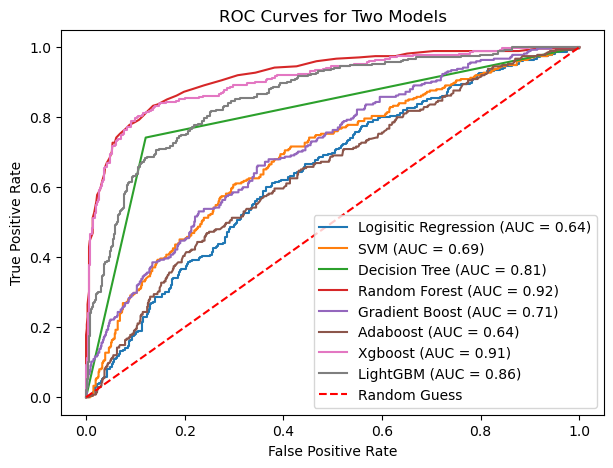

In [141]:
models={
    "Logisitic Regression":LogisticRegression(class_weight=({0: (1-zero_ratio), 1:zero_ratio}), n_jobs=-1),
    "SVM": SVC(class_weight=({0: (1-zero_ratio), 1:zero_ratio}), probability=True),
    "Decision Tree":DecisionTreeClassifier(class_weight=({0: (1-zero_ratio), 1:zero_ratio})),
    "Random Forest":RandomForestClassifier(class_weight=({0: (1-zero_ratio), 1:zero_ratio}), n_jobs=-1),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier(class_weight=({0: (1-zero_ratio), 1:zero_ratio}), n_jobs=-1),
    "LightGBM":lgb.LGBMClassifier(random_state=42, class_weight=({0: (1-zero_ratio), 1:zero_ratio}), n_jobs=-1) # use device='gpu', later
}
predictions={'True': y_test}
target_names=['0','1']

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    predictions[list(models.keys())[i]] = model.predict_proba(X_test)[:, 1]
    
    print(list(models.keys())[i])
    print("Training set performance")
    print(classification_report(y_train, y_train_pred, target_names=target_names))
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    print(f"Roc-Auc Score Training set: {model_train_rocauc_score}")
    print("Test set performance")
    print(classification_report(y_test, y_test_pred, target_names=target_names))
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
    print(f"Roc-Auc Score Test set: {model_test_rocauc_score}")

    print(f"{Fore.BLUE}{Style.BRIGHT}_."*40) # print 50 times = character
    print(Style.RESET_ALL, end="")
plot_model_roc_auc_curve(list(models.keys()), predictions)

<div style="background-color: #e7f3fe; color: #31708f; border-left: 6px solid #b3d4fc; padding: 10px;">
    <strong>Interpration of Curve:</strong> best model is random forest, Xgboost and LightGBM
</div>

<div style="background-color: pink; color: white; border-left: 6px solid #b3d4fc; padding: 10px;">
    <h3>Hyper parameter tuning on LightGBM</h3>
</div>

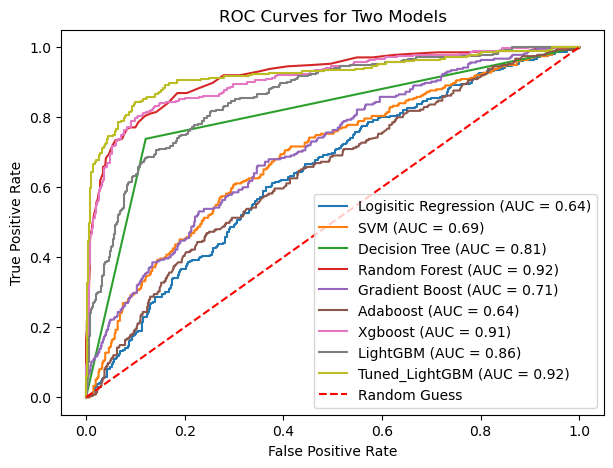



Best hyperparameters: ['learning_rate', 'n_estimators', 'num_leaves']
Best values: [0.2, 200, 51]
Accuracy with best hyperparameters: 0.8878


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'num_leaves': [31, 41, 51],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [75, 100, 150, 200]
}
best_hyperparameters = {}
best_values = {}
 
# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(verbose=-1, objective='binary', num_class=1, boosting_type='gbdt', n_jobs=-1)

# Initialize GridSearchCV for hyperparameters
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5)
 
# Fit the model to the training data to search for the best hyperparameters
grid_search.fit(X_train, y_train)
 
# Get the best hyperparameters and their values
best_params = grid_search.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)
# compare above models preformance
test_df['Tuned_LightGBM'] = best_model.predict_proba(X_test)[:, 1]
plot_model_roc_auc_curve(list(models.keys())+['Tuned_LightGBM'], test_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print('\n\nBest hyperparameters:', best_hyperparameters)
print('Best values:', best_values)
print(f'Accuracy with best hyperparameters: {accuracy:.4f}')

<div style="background-color: #e7f3fe; color: #31708f; border-left: 6px solid #b3d4fc; padding: 10px;">
    <strong>Interpration of Curve:</strong> best model is Tuned and CV LightGBM, random forest and Xgboost
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#85eda1;
           width: 250px;
           height: 50px;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h3 style="padding: 10px;
              color:white;">
    Neural Network<br>
    </h3>
i</div>

In [33]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
def loss_accuracy_plot(epoch, history=None,loss=None, val_loss=None, binary_accuracy=None, val_binary_accuracy=None):
    if (history != None):
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
        train_acc = history.history['binary_accuracy']
        val_acc = history.history['val_binary_accuracy']
        epochs=history.epoch
    else:
        train_loss = loss
        val_loss = val_loss
        train_acc = binary_accuracy
        val_acc = val_binary_accuracy
        epochs=epoch
    # Loss graph
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    # Accuracy graph
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(4,4))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [36]:
def cm(y_test, y_pred, threshold=0.5):
    y_pred = (y_pred > threshold).astype(int)
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='summer', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [37]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=75,
    verbose=2,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [38]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras import initializers
def create_model(layers=[128], activation='relu',output_activation='sigmoid', input_shape=(28,),
                early_stopping=None, batch_size=256, epochs=100):
    model= Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    for i in layers:
        model.add(Dropout(0.5))
        model.add(Dense(i, activation='relu', kernel_initializer=HeNormal()))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    
    # create optimizer
    optimizer = Adam(learning_rate=0.0009)
    loss = BinaryCrossentropy()
    # Compile model
    model.compile(optimizer=optimizer, loss=loss, metrics=[BinaryAccuracy()])
  
    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=batch_size,
              epochs=epochs,
              callbacks=[early_stopping],
              verbose=2)

    score = model.evaluate(X_test, y_test, verbose=2)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    return model, history

In [39]:
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(4,4))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [40]:
def create_model_cv(layers=[128], activation='relu', output_activation='sigmoid', input_shape=(28,), learning_rate=0.0009):
    model = Sequential()
    model.add(Dense(128, activation=activation, input_shape=input_shape))
    for i in layers:
        model.add(Dropout(0.5))
        model.add(Dense(i, activation=activation))
    model.add(Dense(1, activation=output_activation))
   
    optimizer = Adam(learning_rate=learning_rate)
    loss = BinaryCrossentropy()
    model.compile(optimizer=optimizer, loss=loss, metrics=[BinaryAccuracy()])
    return model

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.model_selection import KFold

def cross_validate_model(X, y, layers, learning_rate, batch_size, n_folds=10):
    kfold = KFold(n_splits=n_folds, shuffle=True)
    fold_accuracies = []
    fold_losses = []
    all_y_true = []
    all_y_scores = []
    
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = create_model_cv(layers=layers, learning_rate=learning_rate)
        history = model.fit(X_train, y_train, batch_size=batch_size, epochs=100, verbose=0)

        y_scores = model.predict(X_test).flatten()
        all_y_true.extend(y_test)
        all_y_scores.extend(y_scores)

        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        fold_losses.append(loss)
        fold_accuracies.append(accuracy)

    print(f'Average Loss: {np.mean(fold_losses)}, Average Accuracy: {np.mean(fold_accuracies)}')
    
    return fold_losses, fold_accuracies, all_y_true, all_y_scores

Testing with layers: [256, 128], learning_rate: 0.0003, batch_size: 32
15/15 [==============================] - 0s 1ms/step
Average Loss: 0.41681864857673645, Average Accuracy: 0.8188940048217773


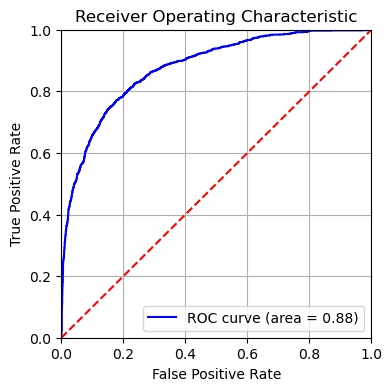

Testing with layers: [256, 128], learning_rate: 0.0003, batch_size: 64
15/15 [==============================] - 0s 1ms/step
Average Loss: 0.44994179010391233, Average Accuracy: 0.8046972990036011


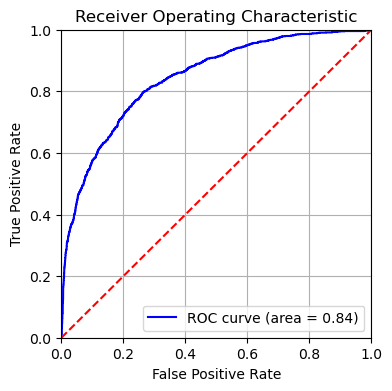

Testing with layers: [256, 128], learning_rate: 0.0003, batch_size: 128
15/15 [==============================] - 0s 1ms/step
Average Loss: 0.49858117997646334, Average Accuracy: 0.7667874574661255


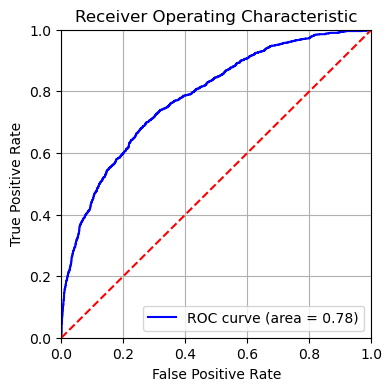

Testing with layers: [256, 128], learning_rate: 0.0005, batch_size: 32
15/15 [==============================] - 0s 6ms/step
Average Loss: 0.3604858487844467, Average Accuracy: 0.8349930107593536


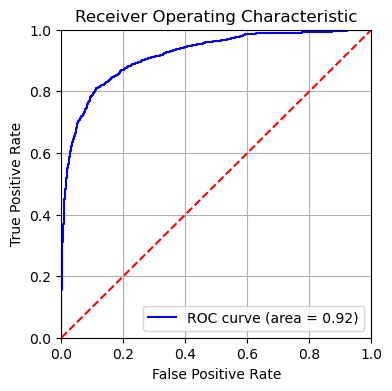

Testing with layers: [256, 128], learning_rate: 0.0005, batch_size: 64
15/15 [==============================] - 1s 31ms/step
Average Loss: 0.4129124104976654, Average Accuracy: 0.8102026462554932


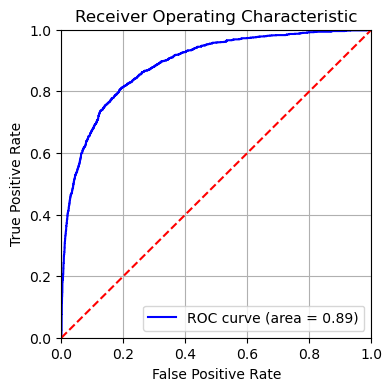

Testing with layers: [256, 128], learning_rate: 0.0005, batch_size: 128
15/15 [==============================] - 0s 9ms/step
Average Loss: 0.4420224815607071, Average Accuracy: 0.7972829401493072


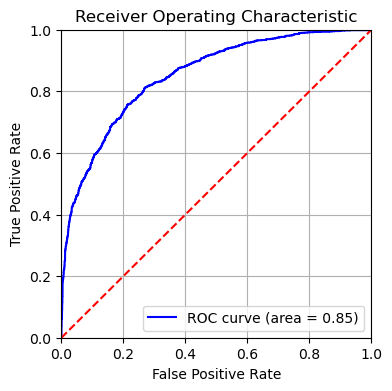

Testing with layers: [256, 128], learning_rate: 0.0007, batch_size: 32
15/15 [==============================] - 0s 6ms/step
Average Loss: 0.306737145781517, Average Accuracy: 0.8657043874263763


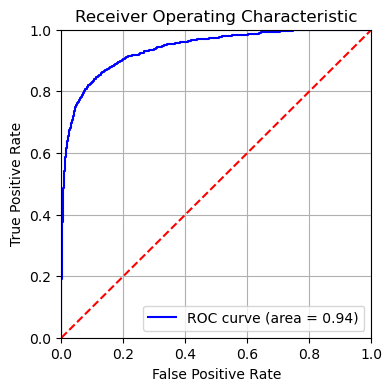

Testing with layers: [256, 128], learning_rate: 0.0007, batch_size: 64
15/15 [==============================] - 0s 10ms/step
Average Loss: 0.35727429389953613, Average Accuracy: 0.8375394105911255


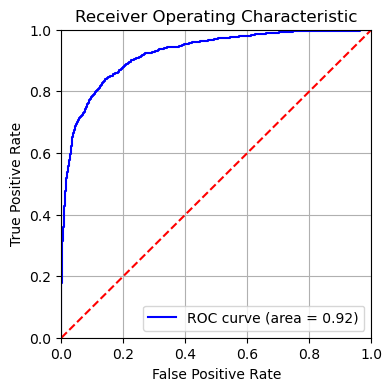

Testing with layers: [256, 128], learning_rate: 0.0007, batch_size: 128
15/15 [==============================] - 0s 3ms/step
Average Loss: 0.3889817237854004, Average Accuracy: 0.8235594987869262


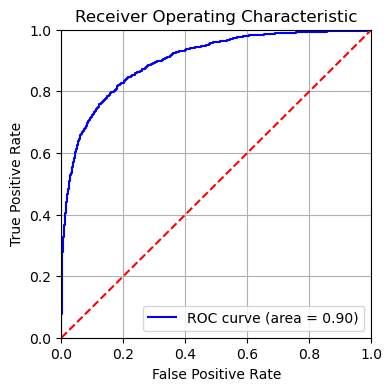

Testing with layers: [256, 128], learning_rate: 0.0009, batch_size: 32
15/15 [==============================] - 0s 4ms/step
Average Loss: 0.31692553162574766, Average Accuracy: 0.8606218993663788


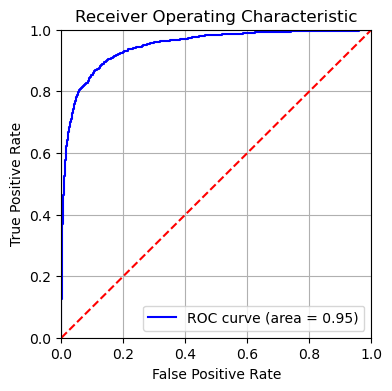

Testing with layers: [256, 128], learning_rate: 0.0009, batch_size: 64
15/15 [==============================] - 0s 4ms/step
Average Loss: 0.34518882930278777, Average Accuracy: 0.8493948698043823


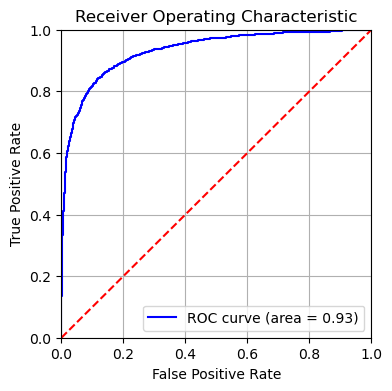

Testing with layers: [256, 128], learning_rate: 0.0009, batch_size: 128
15/15 [==============================] - 0s 3ms/step
Average Loss: 0.375998330116272, Average Accuracy: 0.8243962109088898


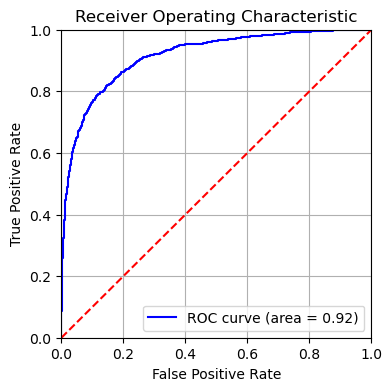

Testing with layers: [128, 64], learning_rate: 0.0003, batch_size: 32
15/15 [==============================] - 0s 5ms/step
Average Loss: 0.44268937706947326, Average Accuracy: 0.7983462870121002


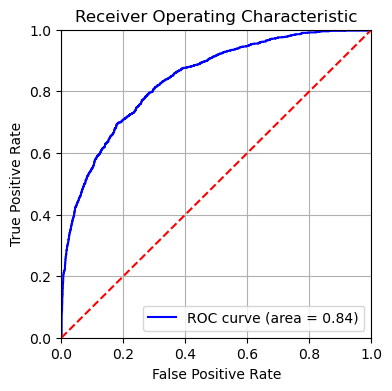

Testing with layers: [128, 64], learning_rate: 0.0003, batch_size: 64
15/15 [==============================] - 0s 4ms/step
Average Loss: 0.49011180698871615, Average Accuracy: 0.7735626399517059


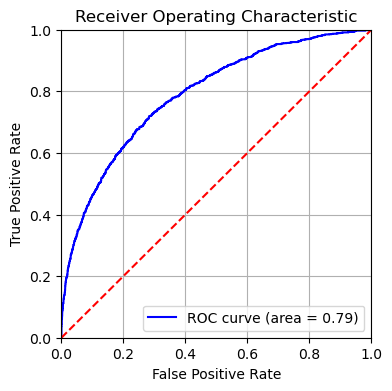

Testing with layers: [128, 64], learning_rate: 0.0003, batch_size: 128
15/15 [==============================] - 0s 7ms/step
Average Loss: 0.5214303761720658, Average Accuracy: 0.7519542574882507


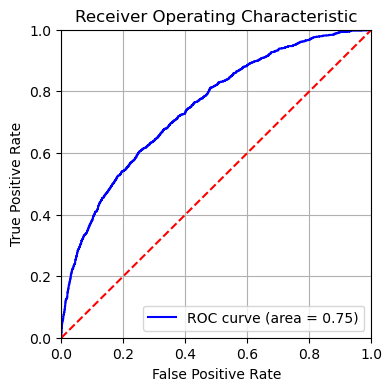

Testing with layers: [128, 64], learning_rate: 0.0005, batch_size: 32
15/15 [==============================] - 0s 8ms/step
Average Loss: 0.3855505883693695, Average Accuracy: 0.8345652520656586


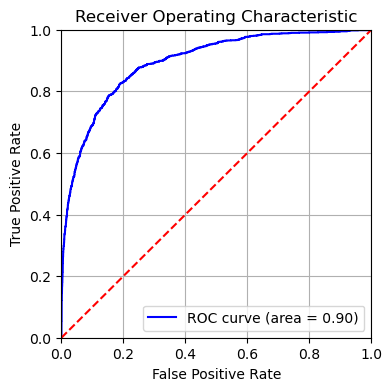

Testing with layers: [128, 64], learning_rate: 0.0005, batch_size: 64
15/15 [==============================] - 1s 12ms/step
Average Loss: 0.42165676355361936, Average Accuracy: 0.8102151691913605


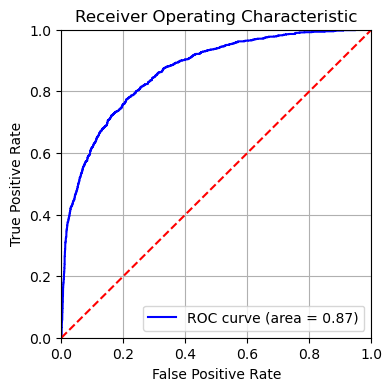

Testing with layers: [128, 64], learning_rate: 0.0005, batch_size: 128
15/15 [==============================] - 0s 5ms/step
Average Loss: 0.4629559576511383, Average Accuracy: 0.7843704104423523


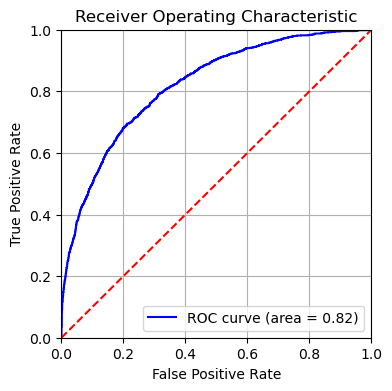

Testing with layers: [128, 64], learning_rate: 0.0007, batch_size: 32
15/15 [==============================] - 0s 3ms/step


In [ ]:
# Örnek hiperparametre ayarları
layers_options = [[256, 128], [128, 64]]  # Örnek katman sayıları
learning_rates = [0.0003, 0.0005, 0.0007, 0.0009]  # Öğrenme oranları
batch_sizes = [32, 64, 128]

X = X_transformed
y = df.Passport

# Grid search benzeri döngü
for layers in layers_options:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            print(f'Testing with layers: {layers}, learning_rate: {learning_rate}, batch_size: {batch_size}')
            losses, accuracies, all_y_true, all_y_scores = cross_validate_model(X, y, layers, learning_rate, batch_size)
            plot_roc_curve(all_y_true, all_y_scores)

<div style="background-color: #e7f3fe; color: #31708f; border-left: 6px solid #b3d4fc; padding: 10px;">
    <strong>Best Parameters : </strong> [256, 128], learning_rate: 0.0009, batch_size: 32
</div>

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import make_scorer, f1_score

pos_label = 0
scorer = make_scorer(f1_score, pos_label=pos_label)
base_model = RandomForestClassifier(class_weight=({0: (1-zero_ratio), 1:zero_ratio}), n_jobs=-1)
model = TunedThresholdClassifierCV(base_model, scoring=scorer)
scorer(model.fit(X_transformed, y), X_transformed, y)
# compare it with the internal score found by cross-validation
model.best_score_
model.best_threshold_

0.6065656565656565

15/15 [==============================] - 0s 12ms/step
Average Loss: 0.3139597326517105, Average Accuracy: 0.861905163526535
Result


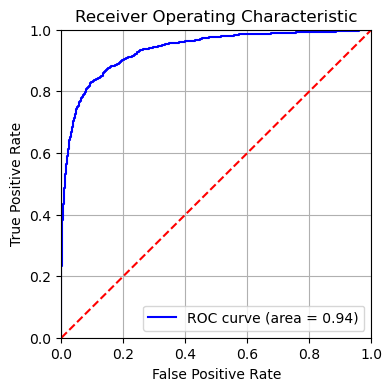

In [50]:
losses, accuracies, all_y_true, all_y_scores = cross_validate_model(X_transformed, y, layers= [256, 128], batch_size=32, learning_rate=0.0009, n_folds=10)
print("Result")
plot_roc_curve(all_y_true, all_y_scores)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3346
           1       0.79      0.81      0.80      1375

    accuracy                           0.88      4721
   macro avg       0.86      0.86      0.86      4721
weighted avg       0.88      0.88      0.88      4721



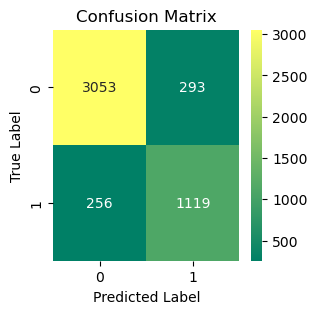

In [55]:
cm(all_y_true, all_y_scores, threshold=np.round(model.best_threshold_, decimals=2))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3346
           1       0.72      0.85      0.78      1375

    accuracy                           0.86      4721
   macro avg       0.83      0.86      0.84      4721
weighted avg       0.87      0.86      0.86      4721



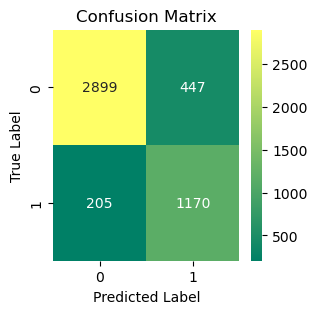

In [60]:
y_pred = np.array(all_y_scores)
cm(all_y_true, y_pred)

<div style="background-color: pink; color: white; border-left: 6px solid #b3d4fc; padding: 10px;">
    <h3>Handling Class Imbalancing - Oversampling</h3>
</div>

In [146]:
def pie_graph(df, target_variable, color_palette="pastel"):
    # data = [len(df.target[df.target==1]), len(df.target[df.target==0])]
    data = [len(df[target_variable][df[target_variable]==1]), len(df[target_variable][df[target_variable]==0])]
    palette_color = sns.color_palette(color_palette) 
    plt.figure(figsize=(2,2))
    plt.pie(data, labels=['1', '0'], colors=palette_color, autopct='%.0f%%') 
    plt.show()

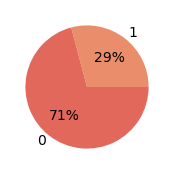

In [152]:
pie_graph(df, 'Passport', color_palette="flare")

In [43]:
minority_ratio = np.round(len(y[y==1]) / len(y), decimals=2)
majority_ratio = np.round(len(y[y==0]) / len(y), decimals=2)
print(f"minority_ratio : {minority_ratio}, majority_ratio : {majority_ratio}")

minority_ratio : 0.29, majority_ratio : 0.71


In [75]:
!pip install imbalanced-learn -q

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X = X_transformed
y = df.Passport
X_resampled, y_resampled = smote.fit_resample(X, y)
print("SMOTE uygulanmış sınıf dağılımı:", Counter(y_resampled))

SMOTE uygulanmış sınıf dağılımı: Counter({1: 3346, 0: 3346})


In [84]:
smote_df = pd.concat([X_resampled, y_resampled], ignore_index=True, axis=1)
columns = smote_df.columns.tolist()
columns[-1] = "target"
smote_df.columns = columns

### Logistic Regression

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5914861837191935
Confusion Matrix:
 [[496 175]
 [372 296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.74      0.64       671
           1       0.63      0.44      0.52       668

    accuracy                           0.59      1339
   macro avg       0.60      0.59      0.58      1339
weighted avg       0.60      0.59      0.58      1339



21/21 [==============================] - 0s 9ms/step
Average Loss: 0.19376376420259475, Average Accuracy: 0.9222956955432892
Result


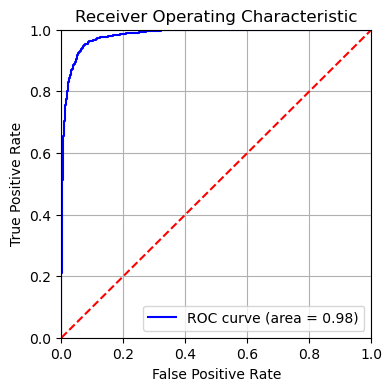

In [86]:
losses, accuracies, all_y_true, all_y_scores = cross_validate_model(X_resampled, y_resampled, layers= [256, 128], batch_size=32, learning_rate=0.0009, n_folds=10)
print("Result")
plot_roc_curve(all_y_true, all_y_scores)

In [91]:
def predict_augmented(df, target_variable, zero_ratio=0.5):
    models={
        "Random Forest":RandomForestClassifier(class_weight=({0: (1-zero_ratio), 1:zero_ratio}), n_jobs=-1),
        "Gradient Boost":GradientBoostingClassifier(),
        "Adaboost":AdaBoostClassifier(),
        "Xgboost":XGBClassifier(class_weight=({0: (1-zero_ratio), 1:zero_ratio}), n_jobs=-1),
        "LightGBM":lgb.LGBMClassifier(random_state=42, class_weight=({0: (1-zero_ratio), 1:zero_ratio}), n_jobs=-1) # use device='gpu', later
    }
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[target_variable]), df[target_variable], test_size=0.2, random_state=42)
    predictions={'True': y_test}
    target_names=['0','1']
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model
    
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        predictions[list(models.keys())[i]] = model.predict_proba(X_test)[:, 1]
        
        print(list(models.keys())[i])
        print("Training set performance")
        print(classification_report(y_train, y_train_pred, target_names=target_names))
        model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
        print(f"Roc-Auc Score Training set: {model_train_rocauc_score}")
        print("Test set performance")
        print(classification_report(y_test, y_test_pred, target_names=target_names))
        model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
        print(f"Roc-Auc Score Test set: {model_test_rocauc_score}")
        
        print(f"{Fore.BLUE}{Style.BRIGHT}="*40) # print 50 times = character
        print(Style.RESET_ALL, end="")
    plot_model_roc_auc_curve(list(models.keys()), predictions)

Random Forest
Training set performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2675
           1       1.00      1.00      1.00      2678

    accuracy                           1.00      5353
   macro avg       1.00      1.00      1.00      5353
weighted avg       1.00      1.00      1.00      5353

Roc-Auc Score Training set: 1.0
Test set performance
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       671
           1       0.95      0.86      0.90       668

    accuracy                           0.91      1339
   macro avg       0.91      0.91      0.91      1339
weighted avg       0.91      0.91      0.91      1339

Roc-Auc Score Test set: 0.9080345270710443
Gradient Boost
Training set performance
              precision    recall  f1-score   support

           0       0.77      0.93      0.85      2675
           1       0.92      0.72      0.81      2678

    acc

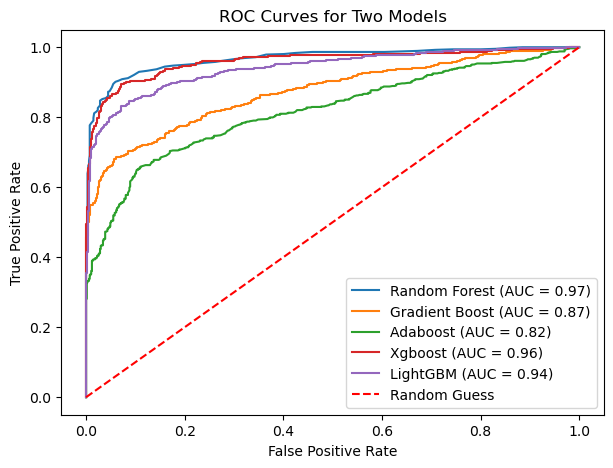

In [92]:
predict_augmented(smote_df, 'target')

<div style="background-color: #f7f3a1; color: #dbd10d; border-left: 6px solid #dbd10d; padding: 10px;">
    <strong> Data Augmentation 1 </strong>
</div>

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

def build_generator(latent_dim, minority_class_data):
    model = models.Sequential()
    model.add(layers.Dense(256, input_dim=latent_dim, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(minority_class_data.shape[1], activation='tanh'))
    model.compile(optimizer=Adam(learning_rate=0.0001, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
def build_discriminator(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(1024, input_dim=input_shape, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [ ]:
# GAN'ı eğitmek için fonksiyon
def train_gan(generator, discriminator, gan, minority_class_data, latent_dim, epochs=10000, batch_size=64):
    half_batch = batch_size // 2
    minority_class_data.reset_index(drop=True, inplace=True)
    for epoch in range(epochs):
        # Gerçek veriler
        idx = np.random.randint(0, minority_class_data.shape[0], half_batch)
        real_datas = minority_class_data.iloc[idx]
        
        # Sahte veriler (Generator tarafından üretilen)
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_datas = generator.predict(noise)
        
        # Discriminator'ü eğitme
        d_loss_real = discriminator.train_on_batch(real_datas, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_datas, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Generator'ü eğitme
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        
        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")

# GAN modellerini oluştur
latent_dim = X.shape[1]
minority_class_data = X.iloc[y[y==1].index]

generator = build_generator(latent_dim, minority_class_data)
discriminator = build_discriminator(minority_class_data.shape[1])
gan = build_gan(generator, discriminator)
# GAN'ı eğit
train_gan(generator, discriminator, gan, minority_class_data, latent_dim)

In [119]:
y[y==1].index

Index([   0,    2,    3,    6,   11,   14,   16,   17,   19,   25,
       ...
       4703, 4705, 4707, 4708, 4709, 4712, 4715, 4716, 4717, 4720],
      dtype='int64', length=1375)

In [136]:
# Yeni veriler üretme
noise = np.random.normal(0, 1, (int((majority_ratio-minority_ratio)*len(y)), latent_dim))  # yeni örnek üretmek için
generated_data = generator.predict(noise)

62/62 [==============================] - 0s 3ms/step


In [139]:
generated_data.shape

(1982, 28)

In [140]:
# Yeni veriyi veri setine entegre etme
augmented_data_gan = np.concatenate([minority_class_data, generated_data], axis=0)

In [143]:
augmented_data_gan.shape

(3357, 28)

In [156]:
augmented_data_gan = pd.DataFrame(augmented_data_gan)

In [175]:
zero_data = X.iloc[y[y==0].index]

In [176]:
zero_data.shape[0]

3346

In [177]:
zero_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.137698,0.302582,-0.703887,-0.136475,-0.648231,0.961048,0.526160,-0.479654,0.786059,-0.060764
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.239578,-0.704105,-0.703887,-0.848667,-1.197754,-1.382500,0.526160,-0.479654,0.786059,1.406580
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.137698,-0.704105,-0.703887,-0.848667,-1.197754,-0.210726,-0.728386,-0.479654,0.786059,1.406580
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.137698,-0.704105,-0.703887,1.762704,-0.648231,-0.210726,-0.728386,-0.479654,-1.272169,-0.794436
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-1.239578,0.302582,-0.703887,1.644006,-1.197754,-1.382500,-0.728386,-0.479654,-1.272169,-0.060764


In [158]:
augmented_df1 = pd.concat([augmented_data_gan, zero_data], ignore_index=True)
y = np.zeros((augmented_data_gan.shape[0] + zero_data.shape[0]), dtype=int)
y[:augmented_data_gan.shape[0]] = 1
augmented_df1['target'] = y

In [187]:
augmented_df1.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,target
6701,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.219621,0.786059,1.571680,2.099388,-1.528108,0.302582,2.132822,1.590613,0.526160,0
6702,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.100923,-1.272169,-0.537728,-0.098707,1.406580,0.302582,0.961048,-2.018568,-0.728386,0


In [188]:
# augmented_df1.to_csv("augmented_df1.csv", index=False)

In [48]:
augmented_df1.tail()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,target
6698,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.219621,-1.272169,0.288034,-0.098707,0.672908,0.302582,-0.210726,-0.268662,1.780706,0
6699,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.525307,0.786059,0.998366,1.549864,-0.060764,0.302582,0.961048,2.356197,0.526160,0
6700,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.169211,0.786059,-0.395772,-0.648231,-1.528108,-1.710792,0.961048,0.387553,1.780706,0
6701,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.219621,0.786059,1.571680,2.099388,-1.528108,0.302582,2.132822,1.590613,0.526160,0
6702,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.100923,-1.272169,-0.537728,-0.098707,1.406580,0.302582,0.961048,-2.018568,-0.728386,0


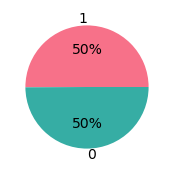

In [150]:
pie_graph(augmented_df1, 'target', color_palette=sns.color_palette("husl", 2))

Random Forest
Training set performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2696
           1       1.00      1.00      1.00      2666

    accuracy                           1.00      5362
   macro avg       1.00      1.00      1.00      5362
weighted avg       1.00      1.00      1.00      5362

Roc-Auc Score Training set: 1.0
Test set performance
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       650
           1       0.99      0.81      0.89       691

    accuracy                           0.90      1341
   macro avg       0.91      0.90      0.90      1341
weighted avg       0.91      0.90      0.90      1341

Roc-Auc Score Test set: 0.8999621507291551
Gradient Boost
Training set performance
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      2696
           1       0.94      0.73      0.82      2666

    acc

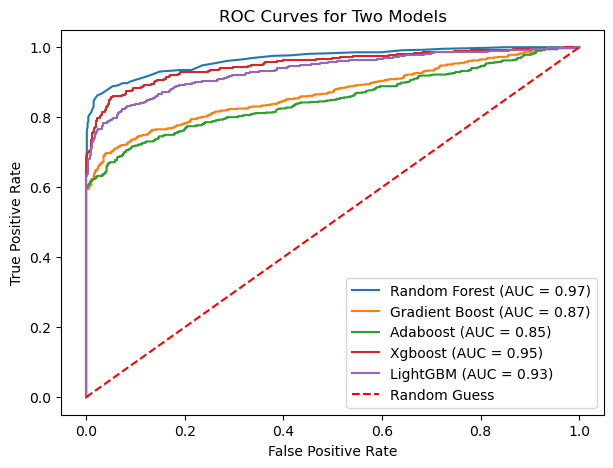

In [89]:
predict_augmented(augmented_df1, 'target')

<div style="background-color: #f7f3a1; color: #dbd10d; border-left: 6px solid #dbd10d; padding: 10px;">
    <strong> Data Augmentation 2 </strong>
</div>

In [165]:
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import numpy as np

# Encoder Modeli
def build_encoder(input_shape, latent_dim):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(512, activation='relu')(inputs)
    x = layers.Dense(256, activation='relu')(x)
    
    # Latent variable
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)
    
    encoder = models.Model(inputs, [z_mean, z_log_var])
    return encoder

# Sampling fonksiyonu
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Decoder Modeli
def build_decoder(latent_dim, output_shape):
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(256, activation='relu')(latent_inputs)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(output_shape, activation='sigmoid')(x)
    decoder = models.Model(latent_inputs, x)
    return decoder

# VAE Modeli
def build_vae(input_shape, latent_dim):
    inputs = layers.Input(shape=input_shape)
    encoder = build_encoder(input_shape, latent_dim)
    z_mean, z_log_var = encoder(inputs)
    z = layers.Lambda(sampling)([z_mean, z_log_var])
    
    decoder = build_decoder(latent_dim, input_shape[0])
    outputs = decoder(z)
    
    vae = models.Model(inputs, outputs)
    
    # Loss function
    xent_loss = K.sum(K.binary_crossentropy(inputs, outputs), axis=-1)
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(xent_loss + kl_loss)
    
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    return vae, decoder

In [163]:
X = X_transformed
y = df.Passport

In [166]:
latent_dim = X.shape[1]
minority_class_data = X.iloc[y[y==1].index]
vae, decoder = build_vae(minority_class_data.shape[1:], latent_dim)
vae.fit(minority_class_data, minority_class_data, epochs=100, batch_size=64)
z_sample = np.random.normal(0, 1, (int((majority_ratio-minority_ratio)*len(y)), latent_dim))  # yeni örnek üretmek için
generated_data_vae = decoder.predict(z_sample)
augmented_data_vae = np.concatenate([minority_class_data, generated_data_vae], axis=0)

Epoch 1/100
22/22 [==============================] - 1s 6ms/step - loss: 10.8528
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: -211.3954
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: -16504.5918
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: -279334.5312
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: -2129874.2500
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: -9777729.0000
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: -34956116.0000
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 22884513792.0000
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: -228858608.0000
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: -420042240.0000
Epoch 11/100
22/22 [==============================] - 0s 4ms/step - loss: -702769408.0000
Epoch 12/100
22/22 [========================

In [172]:
print(f"number of generated data : {generated_data_vae.shape[0]}, new minortiy class element size: {augmented_data_vae.shape[0]}")

number of generated data : 1982, new minortiy class element size: 3357


In [191]:
augmented_data_vae

array([[ 1.        ,  0.        ,  1.        , ...,  2.08483713,
         0.78605914, -0.79443574],
       [ 1.        ,  0.        ,  0.        , ...,  2.08483713,
        -1.27216892, -0.06076377],
       [ 0.        ,  0.        ,  1.        , ..., -0.47965377,
         0.78605914,  1.40658019],
       ...,
       [ 0.72961116,  0.08825181,  0.46341574, ...,  0.42556533,
         0.        ,  0.        ],
       [ 0.72961116,  0.08825181,  0.46341574, ...,  0.42556533,
         0.        ,  0.        ],
       [ 0.72961116,  0.08825181,  0.46341574, ...,  0.42556533,
         0.        ,  0.        ]])

In [192]:
augmented_data_vae = pd.DataFrame(augmented_data_vae)
zero_data_df = pd.DataFrame(zero_data)
augmented_df2 = pd.concat([augmented_data_vae, zero_data_df], ignore_index=True)
y = np.zeros((augmented_data_vae.shape[0] + zero_data_df.shape[0]), dtype=int)
y[:augmented_data_vae.shape[0]] = 1
augmented_df2['target'] = y

In [193]:
augmented_df2

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,target
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.704105,1.490994,-1.086064,-1.197754,-1.382500,-0.728386,2.084837,0.786059,-0.794436,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.302582,-0.703887,-0.848667,2.099388,-1.382500,-0.728386,2.084837,-1.272169,-0.060764,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.704105,-0.703887,-0.729968,-0.648231,-0.210726,-0.728386,-0.479654,0.786059,1.406580,1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.710792,-0.703887,-0.729968,1.000340,-0.210726,1.780706,-0.479654,0.786059,-0.794436,1
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.302582,-0.703887,0.694416,-1.197754,-1.382500,-0.728386,-0.479654,-1.272169,-0.060764,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.302582,-0.703887,0.219621,-0.098707,-0.210726,1.780706,2.084837,-1.272169,0.672908,0
6699,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.302582,-0.703887,1.525307,1.549864,0.961048,0.526160,2.084837,0.786059,-0.060764,0
6700,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-1.710792,0.393554,1.169211,-0.648231,0.961048,1.780706,2.084837,0.786059,-1.528108,0
6701,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.302582,1.490994,0.219621,2.099388,2.132822,0.526160,2.084837,0.786059,-1.528108,0


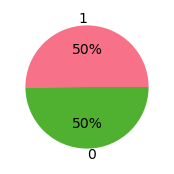

In [199]:
pie_graph(augmented_df2, 'target', color_palette=sns.color_palette("husl", 3))

Random Forest
Training set performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2696
           1       1.00      1.00      1.00      2666

    accuracy                           1.00      5362
   macro avg       1.00      1.00      1.00      5362
weighted avg       1.00      1.00      1.00      5362

Roc-Auc Score Training set: 1.0
Test set performance
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       650
           1       0.99      0.82      0.90       691

    accuracy                           0.90      1341
   macro avg       0.92      0.91      0.90      1341
weighted avg       0.92      0.90      0.90      1341

Roc-Auc Score Test set: 0.9071980407436269
Gradient Boost
Training set performance
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      2696
           1       0.94      0.74      0.83      2666

    acc

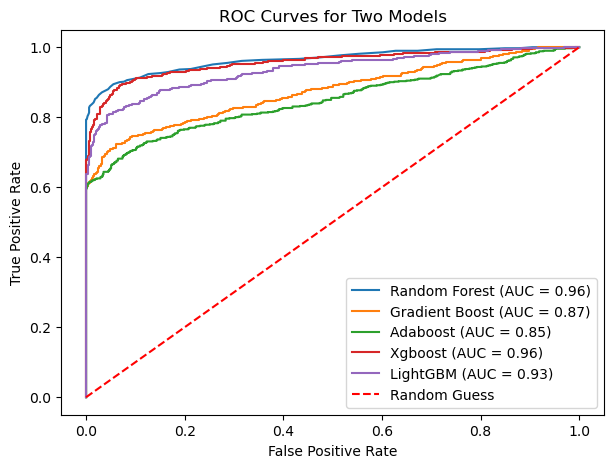

In [201]:
predict_augmented(augmented_df2, 'target')

In [ ]:
# end